<center>

<img src="https://www.infnet.edu.br/infnet/wp-content/uploads/sites/18/2021/10/infnet-30-horizontal-padrao@300x-8-1024x265.png" width="60%"/>
</center>

---

# Algoritmos de Inteligência Artificial para clusterização [25E4_2]
## MIT em Inteligência Artificial, Machine Learning e Deep Learning em Data Science

---


## Analisando um conjunto de dados "complexo"

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print('Versao do Numpy:', np.__version__)
print('Versao do Pandas:', pd.__version__)
print('Versao do Matplotlib:', plt.matplotlib.__version__)
print('Versao do Seaborn:', sns.__version__)

Versao do Numpy: 2.0.2
Versao do Pandas: 2.2.2
Versao do Matplotlib: 3.10.0
Versao do Seaborn: 0.13.2


In [4]:
from sklearn.datasets import make_moons

In [5]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

moon_df = pd.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y))
moon_df.head()

x         y  label
0 -0.021371  0.406186      1
1  0.976700 -0.458323      1
2  0.904059 -0.376520      1
3  0.377363 -0.397037      1
4 -0.841926  0.530587      0

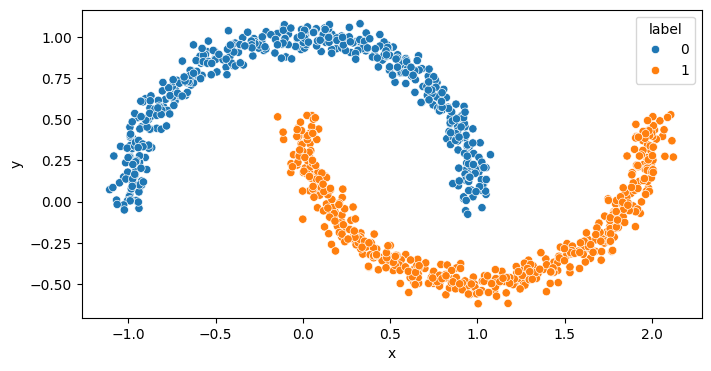

In [6]:
f, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=moon_df, x='x', y='y', hue='label', ax=ax)
plt.show()

In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [8]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
moon_df['kmeans'] = kmeans.labels_

ward = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
moon_df['ward'] = ward.labels_

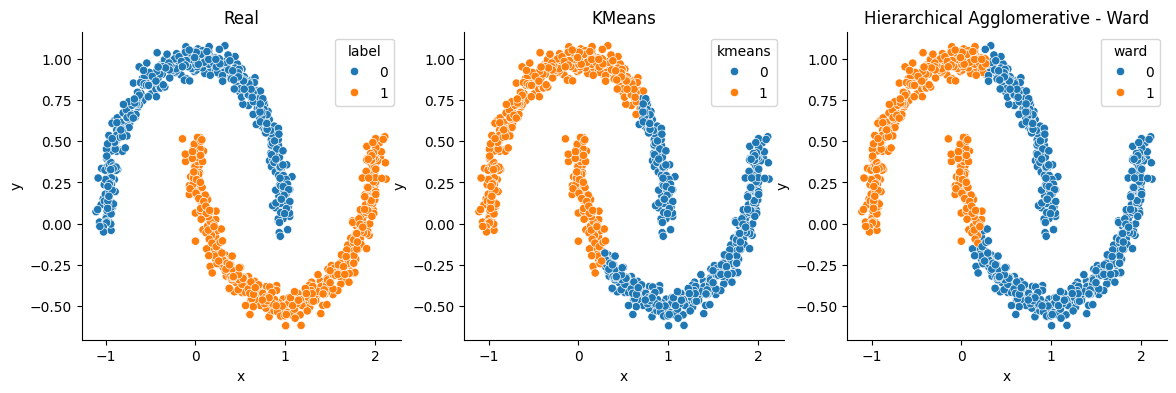

In [10]:
f, ax = plt.subplots(1, 3, figsize=(14, 4))
sns.scatterplot(data=moon_df, x='x', y='y', hue='label', ax=ax[0])
sns.scatterplot(data=moon_df, x='x', y='y', hue='kmeans', ax=ax[1])
sns.scatterplot(data=moon_df, x='x', y='y', hue='ward', ax=ax[2])

ax[0].set_title('Real')
ax[1].set_title('KMeans')
ax[2].set_title('Hierarchical Agglomerative - Ward')

sns.despine()
plt.show()

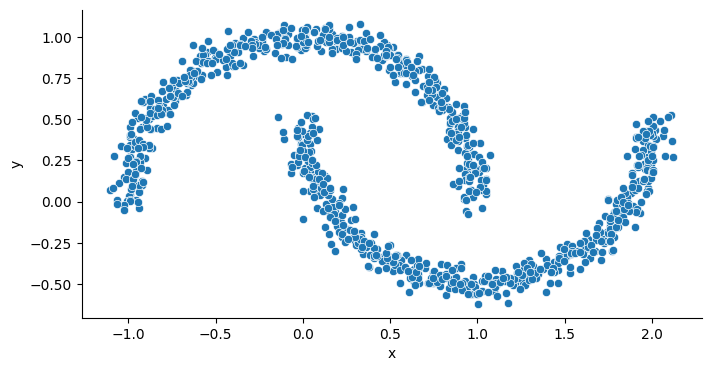

In [13]:
f, ax = plt.subplots(figsize=(8, 4))

sns.scatterplot(data=moon_df, x='x', y='y', ax=ax)

sns.despine()
plt.show()

## DBSCAN

Outro algoritmo de clustering muito útil é o DBSCAN (que significa “density-based spatial clustering of applications with noise”). Os principais benefícios do DBSCAN são que ele não exige que o usuário defina o número de clusters a priori, ele pode capturar clusters de formas complexas e pode identificar pontos que não fazem parte de nenhum cluster.

O DBSCAN é um pouco mais lento do que o clustering aglomerativo e o k-means, mas ainda é escalável para conjuntos de dados relativamente grandes.

O DBSCAN funciona identificando pontos que estão em regiões "aglomeradas" do espaço de recursos, onde muitos pontos de dados estão próximos. Essas regiões são chamadas de regiões densas no espaço de recursos. A ideia por trás do DBSCAN é que os clusters formam regiões densas de dados, separadas por regiões que são relativamente vazias.

Os pontos que estão dentro de uma região densa são chamados de amostras de núcleo (ou pontos de núcleo) e são definidos da seguinte forma. Existem dois parâmetros no DBSCAN: min_samples e eps. Se houver pelo menos min_samples muitos pontos de dados dentro de uma distância de eps para um determinado ponto de dados, esse ponto de dados é classificado como uma amostra de núcleo. As amostras de núcleo que estão mais próximas umas das outras do que a distância eps são colocadas no mesmo cluster pelo DBSCAN.

O algoritmo funciona escolhendo um ponto arbitrário para começar. Ele então encontra todos os pontos com distância eps ou menos daquele ponto. Se houver menos de min_samples pontos dentro da distância eps do ponto inicial, este ponto é rotulado como ruído, o que significa que ele não pertence a nenhum cluster. Se houver mais de min_samples pontos dentro de uma distância de eps, o ponto é rotulado como amostra central e recebe um novo rótulo de cluster. Então, todos os vizinhos (dentro de eps) do ponto são visitados. Se eles ainda não tiverem recebido um cluster, eles recebem o novo rótulo de cluster que acabou de ser criado. Se forem amostras centrais, seus vizinhos são visitados por sua vez, e assim por diante. O cluster cresce até que não haja mais amostras centrais dentro da distância eps do cluster. Então, outro ponto que ainda não foi visitado é escolhido, e o mesmo procedimento é repetido.

No final, existem três tipos de pontos: pontos centrais, pontos que estão dentro da distância eps dos pontos centrais (chamados pontos de fronteira) e ruído. Quando o algoritmo DBSCAN é executado em um conjunto de dados específico várias vezes, o agrupamento dos pontos principais é sempre o mesmo, e os mesmos pontos sempre serão rotulados como ruído. No entanto, um ponto de limite pode ser vizinho de amostras principais de mais de um cluster. Portanto, a associação de cluster de pontos de limite depende da ordem em que os pontos são visitados. Normalmente, há apenas alguns pontos de limite, e essa ligeira dependência da ordem dos pontos não é importante.

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
dbscan_model = DBSCAN(eps=0.15, min_samples=5, n_jobs=-1)
dbscan_labels = dbscan_model.fit_predict(X)

In [ ]:
# dbscan_model.fit(X)
# dbscan_model.labels_

In [16]:
moon_df['dbscan'] = dbscan_labels

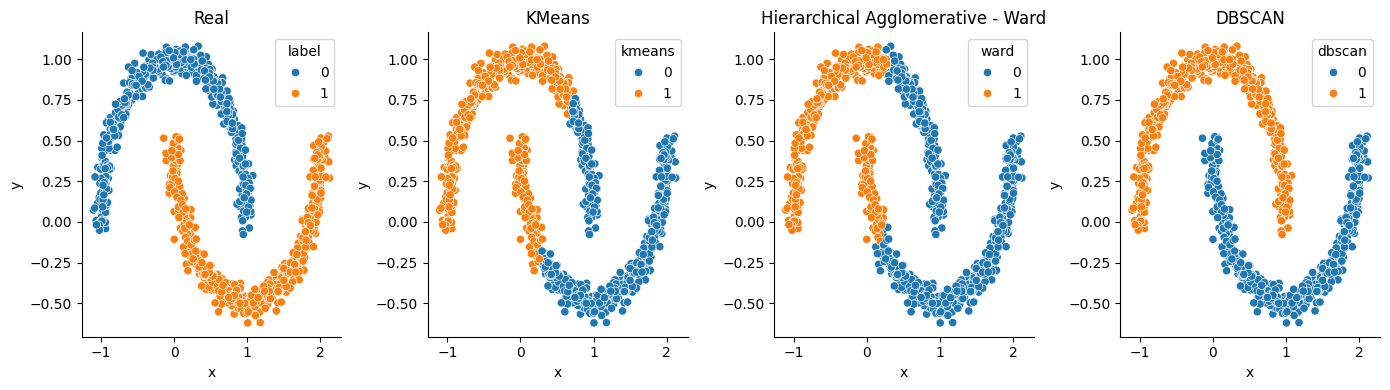

In [24]:
f, ax = plt.subplots(1, 4, figsize=(14, 4))

sns.scatterplot(data=moon_df, x='x', y='y', hue='label', ax=ax[0])
sns.scatterplot(data=moon_df, x='x', y='y', hue='kmeans', ax=ax[1])
sns.scatterplot(data=moon_df, x='x', y='y', hue='ward', ax=ax[2])
sns.scatterplot(data=moon_df, x='x', y='y', hue='dbscan', ax=ax[3])

ax[0].set_title('Real')
ax[1].set_title('KMeans')
ax[2].set_title('Hierarchical Agglomerative - Ward')
ax[3].set_title('DBSCAN')

sns.despine()
plt.tight_layout()
plt.show()

### Análise dos dos hiperparâmetros

- Eps pequeno (~0.1): Muitos pontos são considerados ruído (cluster -1), pois a distância de vizinhança é muito curta.
- Eps médio (~0.2 - 0.3): Melhor separação dos clusters, detectando corretamente as formas das luas.
- Min_samples baixo (~3-5): Pequenos agrupamentos podem ser formados erroneamente, capturando ruído.
- Min_samples alto (~10-15): Muitos pontos podem não ser considerados núcleo, resultando em mais pontos rotulados como ruído.

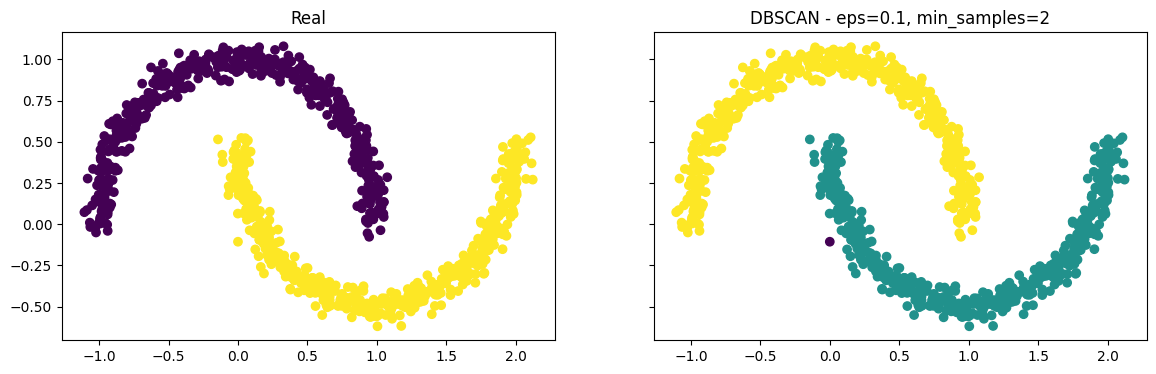

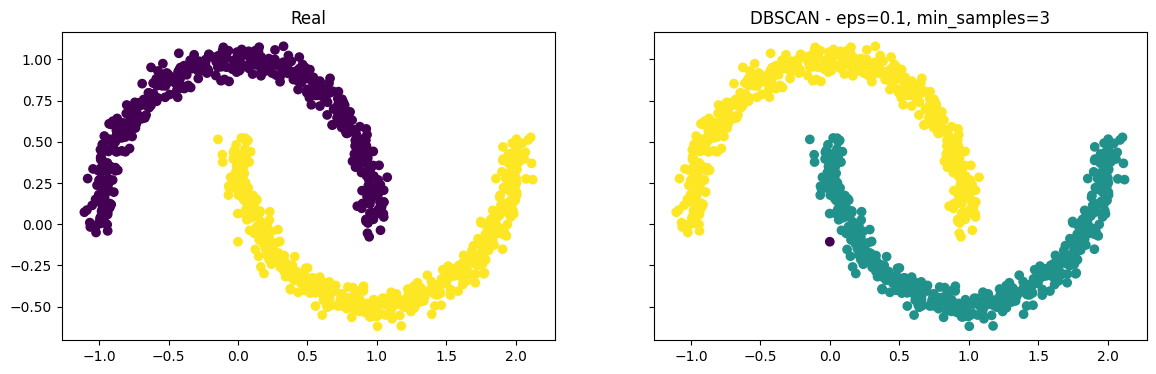

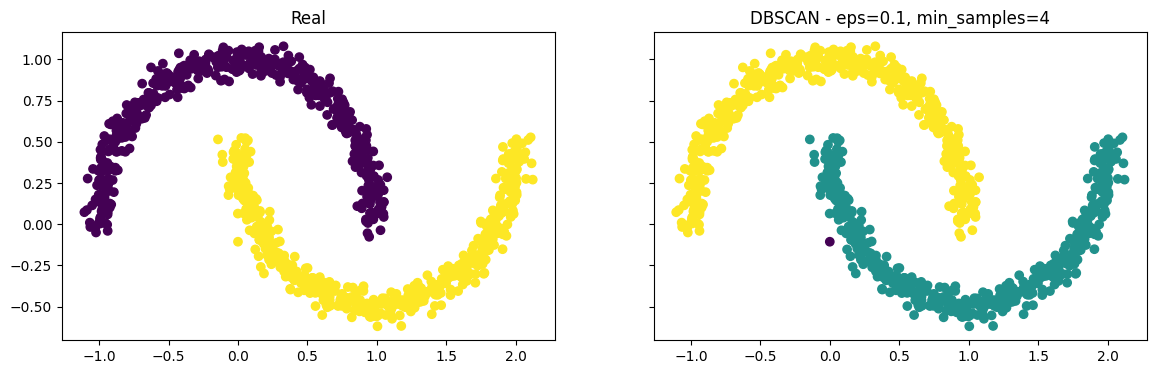

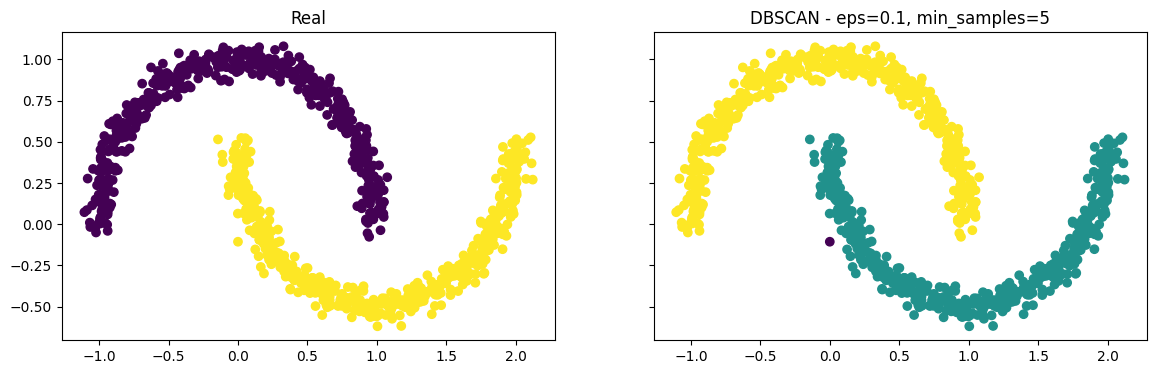

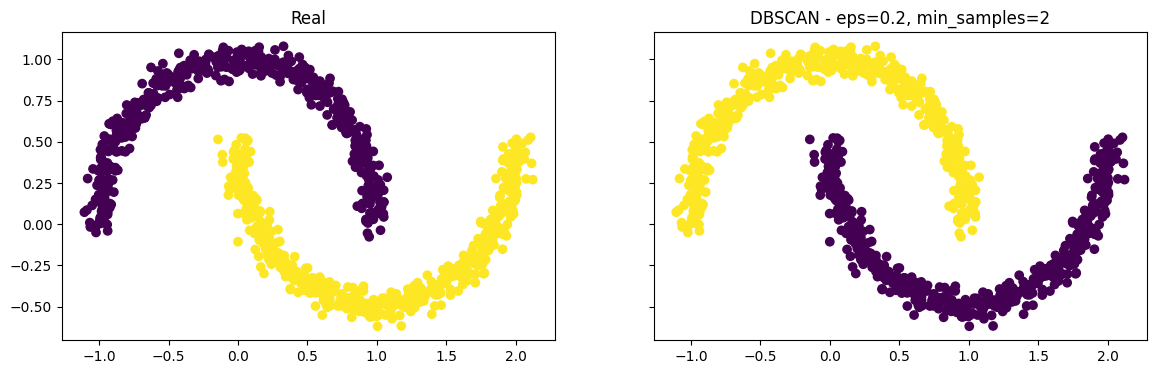

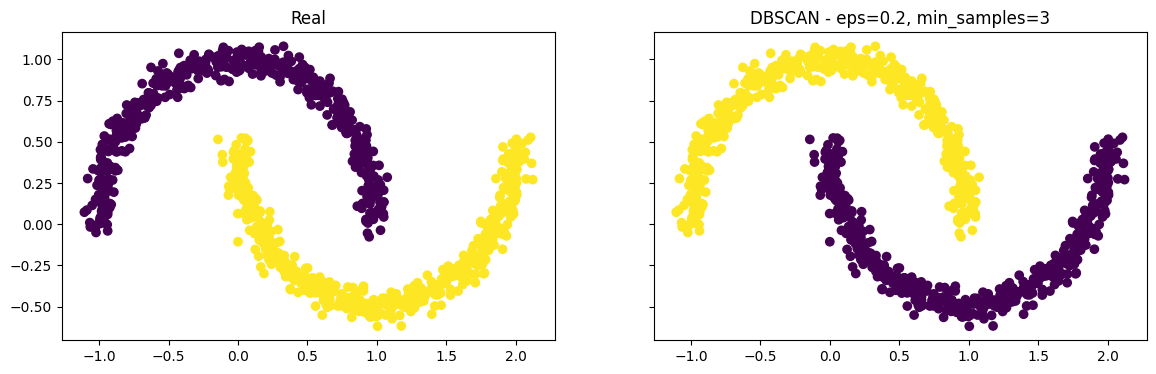

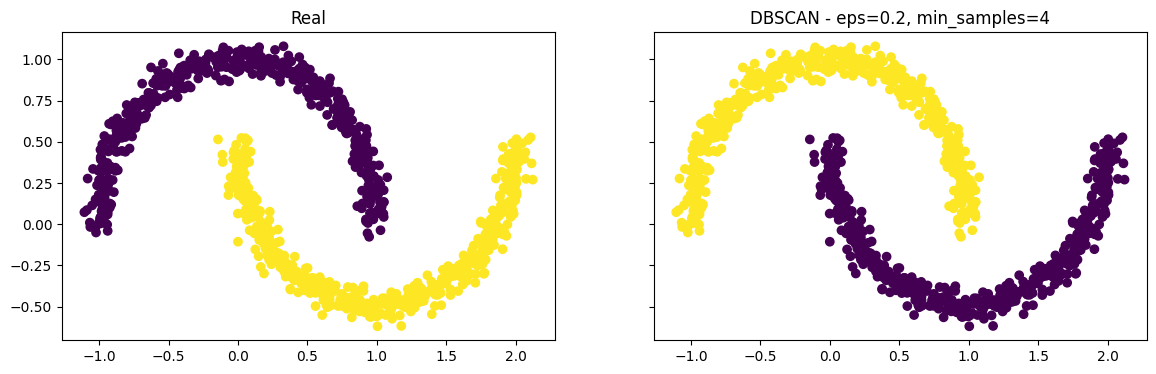

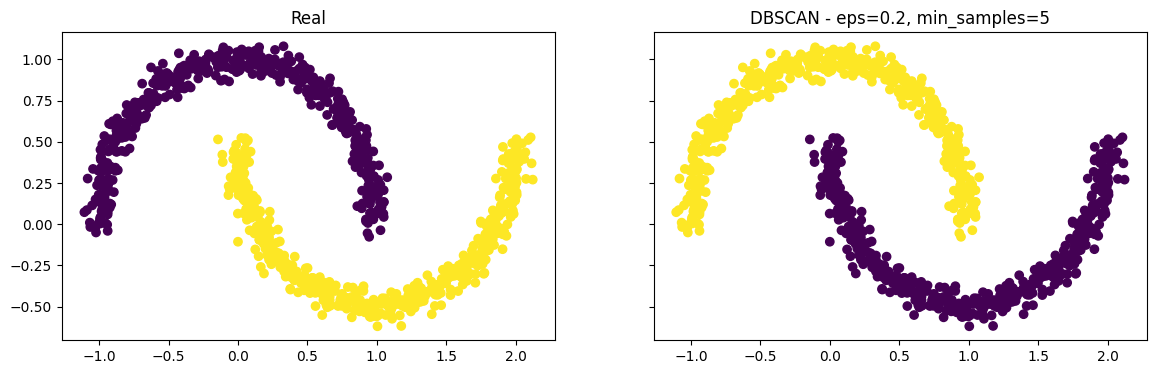

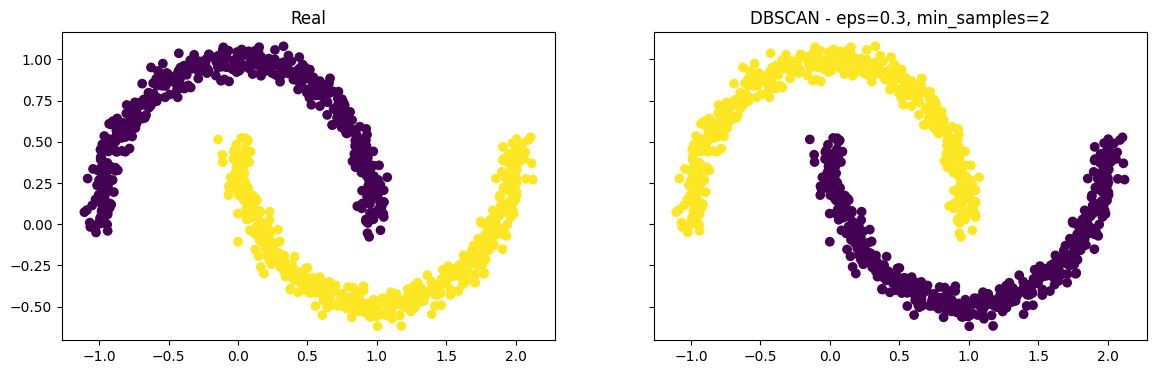

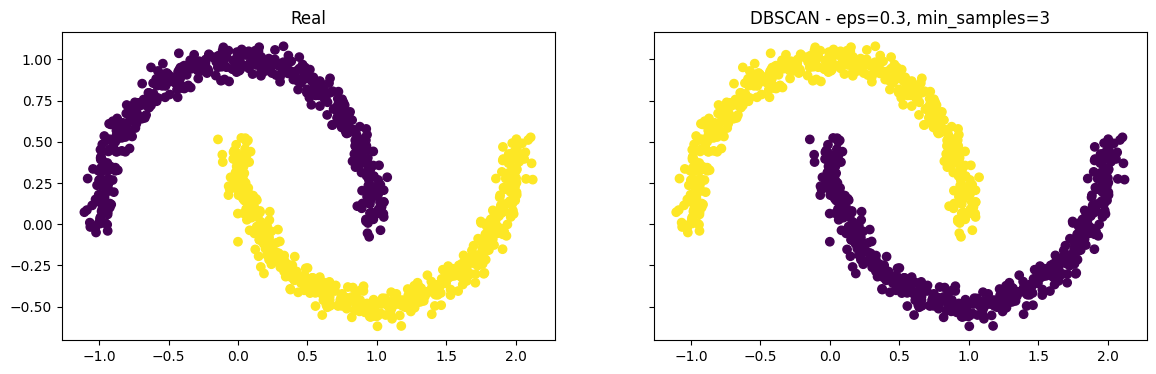

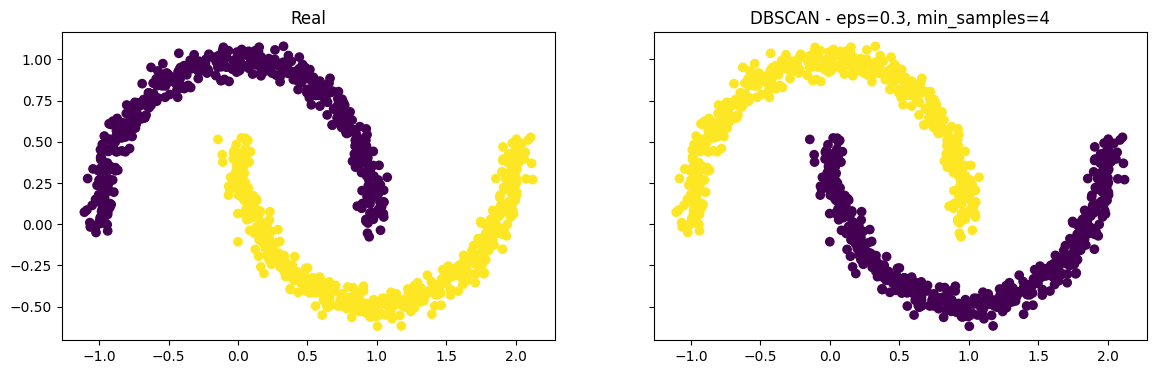

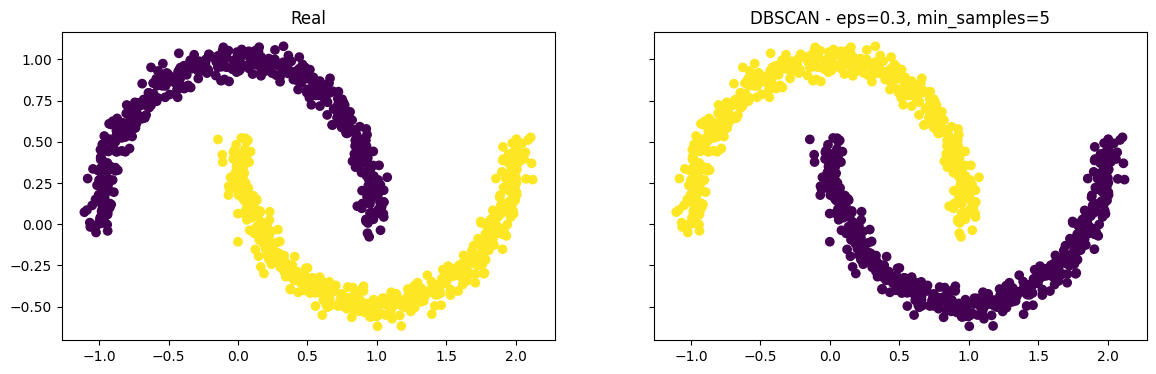

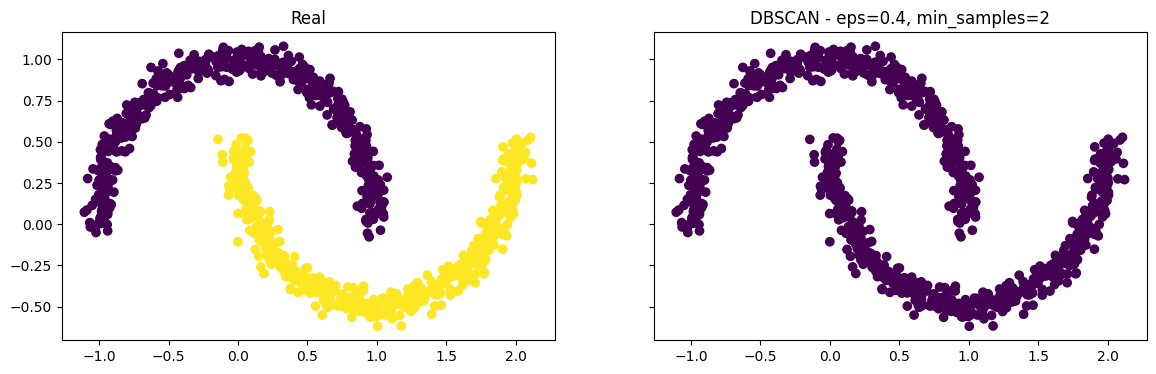

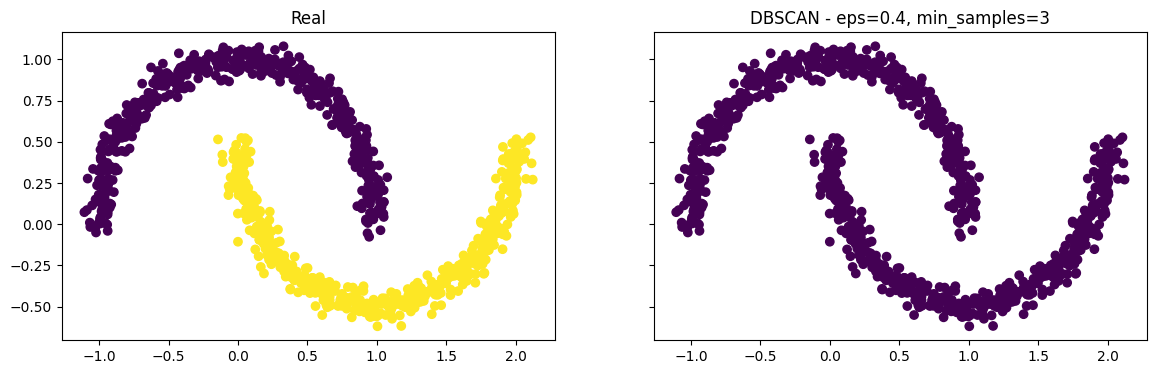

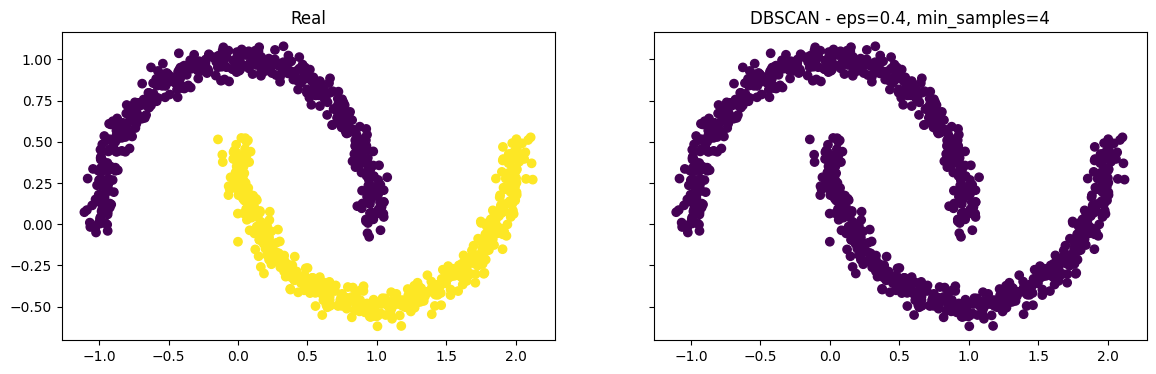

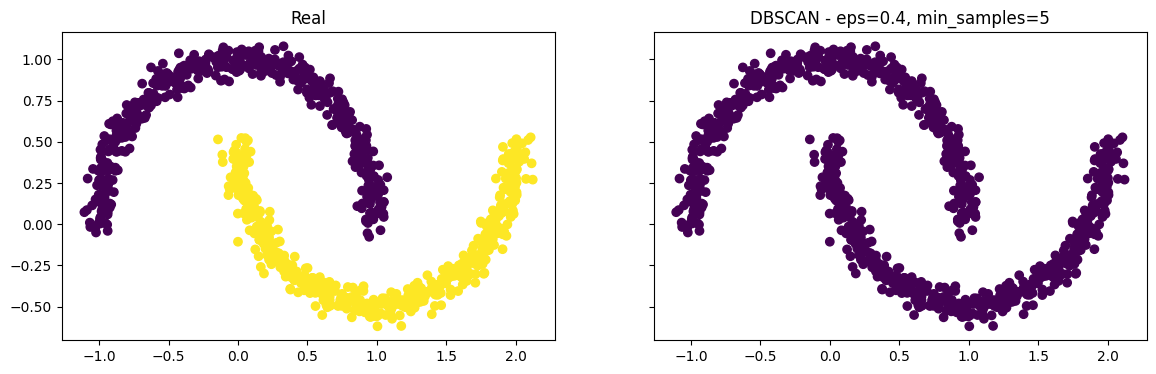

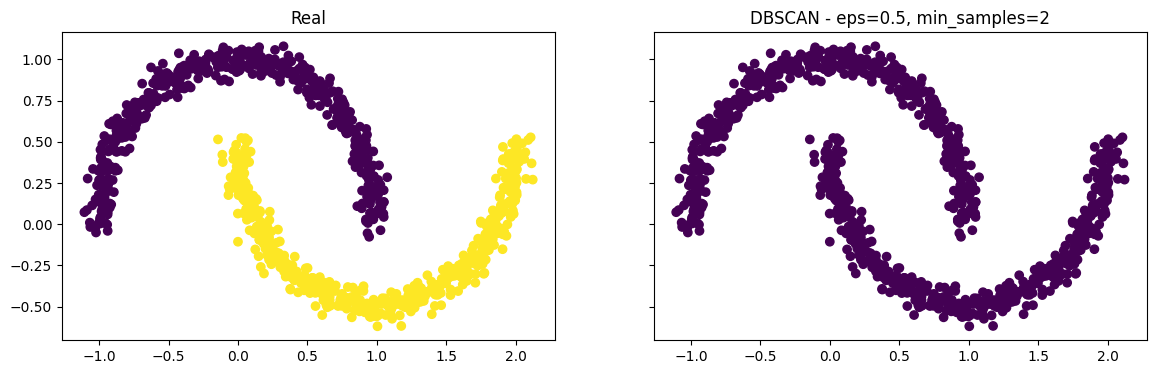

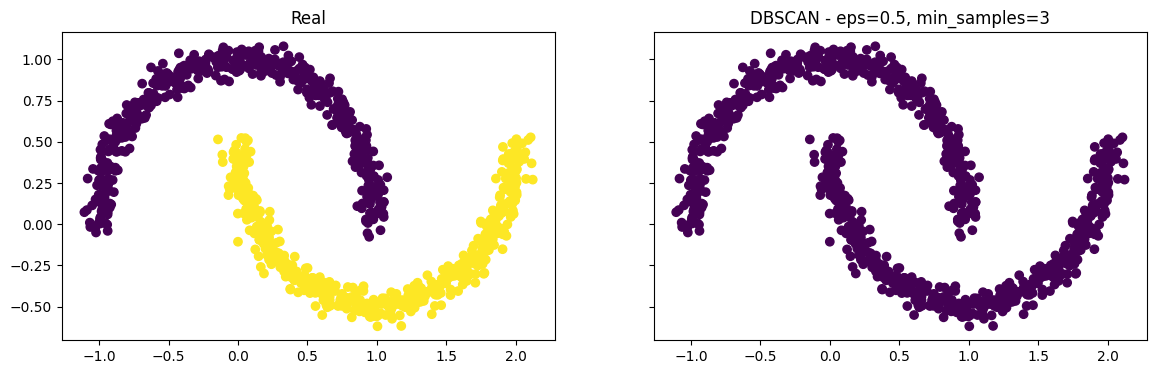

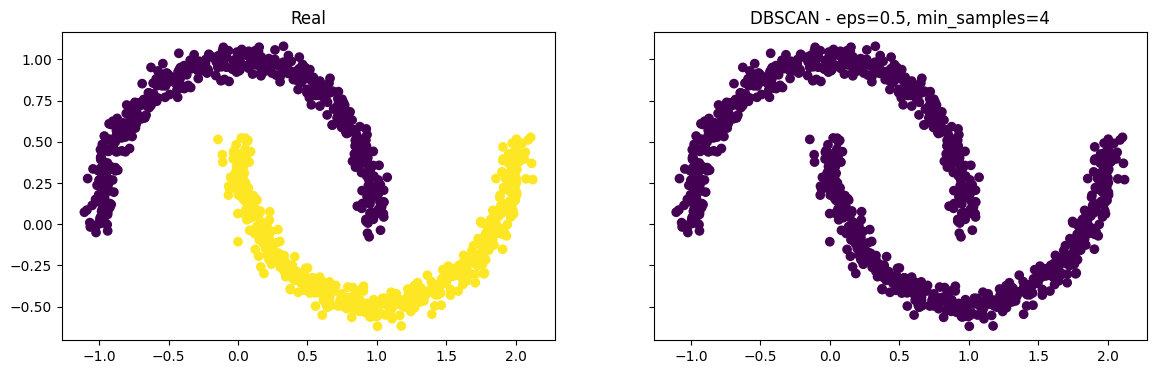

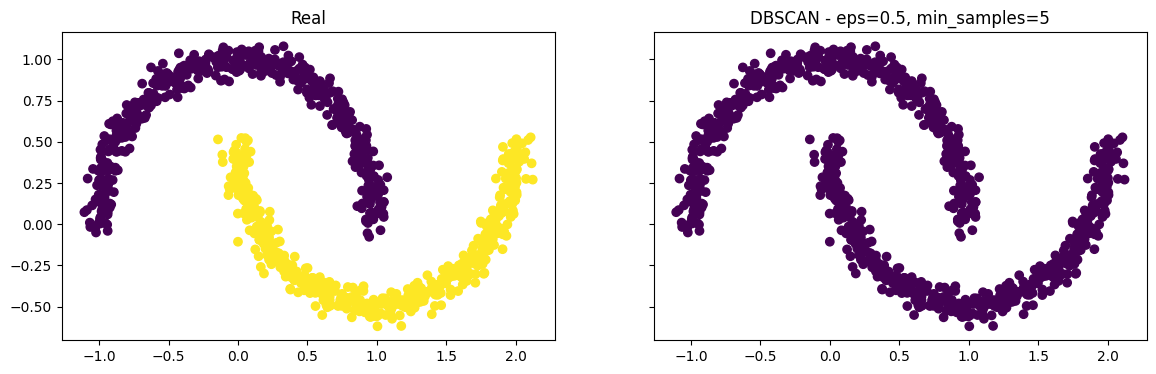

In [25]:
eps_list = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_list = [2, 3, 4, 5]

for eps in eps_list:
  for min_samples in min_samples_list:
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
    dbscan_labels = dbscan_model.fit_predict(X)

    f, ax = plt.subplots(1, 2, sharey=True, figsize=(14, 4))

    ax[0].scatter(X[:, 0], X[:, 1], c=y)
    ax[0].set_title('Real')

    ax[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels)
    ax[1].set_title(f'DBSCAN - eps={eps}, min_samples={min_samples}')

    plt.show()

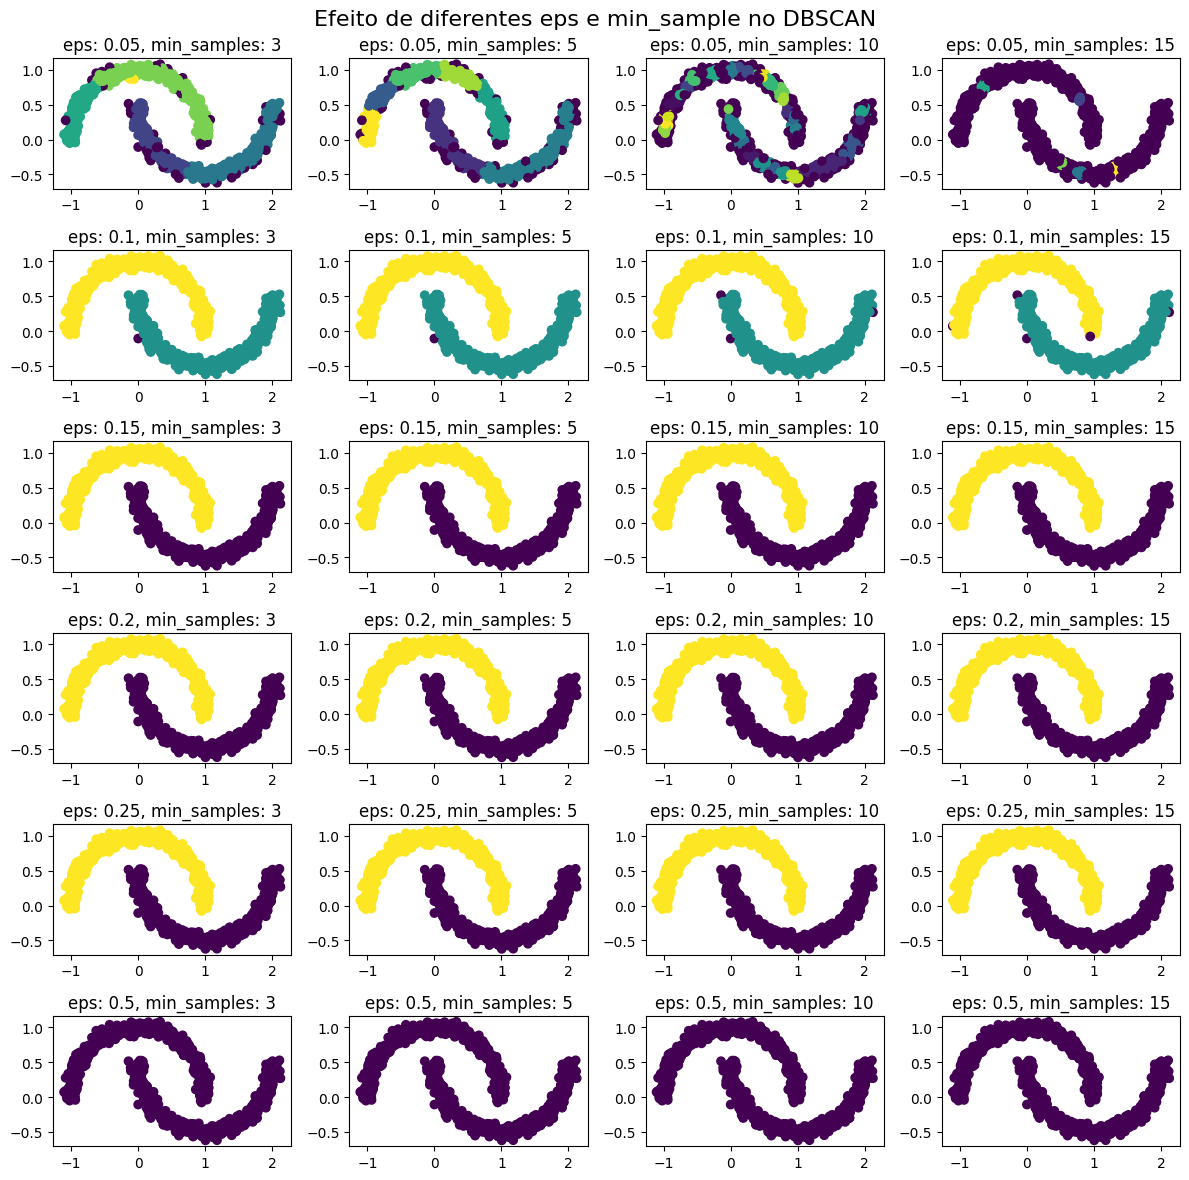

In [26]:
eps_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.5]
min_samples_list = [3, 5, 10, 15]

lines = len(eps_list)
columns = len(min_samples_list)

f, ax = plt.subplots(lines, columns, figsize=(12, 12))
f.suptitle('Efeito de diferentes eps e min_sample no DBSCAN', fontsize=16)

for i, eps in enumerate(eps_list):
  for j, min_samples in enumerate(min_samples_list):
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
    dbscan_labels = dbscan_model.fit_predict(X)

    ax[i, j].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
    ax[i, j].set_title(f'eps: {eps}, min_samples: {min_samples}')

plt.tight_layout()
plt.show()

### Vantagens do DBSCAN

- Descobre clusters de formato arbitrário: Diferente do K-Means, que assume clusters esféricos, o DBSCAN detecta clusters de qualquer forma.
- Lida bem com outliers: Ele identifica pontos de ruído automaticamente.
- Não requer número de clusters pré-definido: Ao contrário do K-Means, que exige um valor de $k$, o DBSCAN encontra clusters dinamicamente.

### Desvantagens do DBSCAN
- Escolha de 𝜀 pode ser difícil: Um valor muito pequeno cria muitos outliers, enquanto um valor muito grande pode unir clusters diferentes.
- Não funciona bem com variações de densidade: Se os clusters possuem densidades muito diferentes, o DBSCAN pode falhar.
- Alto custo computacional para grandes bases: O algoritmo pode ser ineficiente para grandes conjuntos de dados, pois depende de cálculos de vizinhança.



## HDBSCAN

**HDBSCAN** (Hierarchical Density-Based Spatial Clustering of Applications with Noise) é uma evolução do DBSCAN que resolve duas limitações clássicas:

1. a necessidade de um único parâmetro de densidade (ε) bem calibrado, e

2. a dificuldade em lidar com densidades variáveis entre clusters.

Ele constrói uma hierarquia de clusters por densidade e depois seleciona, de forma estatisticamente fundamentada, os clusters mais estáveis, marcando pontos ambíguos como ruído.

### Intuição do HBDSCAN



- DBSCAN: tudo gira em torno de um raio ε fixo e um mínimo de pontos. Funciona bem quando todos os clusters têm densidade similar.

- HDBSCAN: varia efetivamente o “ε” ao longo de uma hierarquia e escolhe automaticamente os níveis onde os grupos são mais estáveis, permitindo densidades diferentes em clusters distintos e melhor separação de ruído.

### Principais parâmetros

- min_cluster_size (o hiperparâmetro): tamanho mínimo que você aceita para um cluster. Guia prático: use o tamanho do menor grupo de interesse (ex.: se quer detectar grupos com ≥ 50 pontos, defina 50–100).

- min_samples (robustez a ruído): se não especificado, min_samples = min_cluster_size. Valores maiores tornam o algoritmo mais conservador (mais ruído, clusters mais “densos”); valores menores aceitam clusters mais frouxos.

- metric: distância; padrão é euclidiana, mas há muitas (p. ex., 'manhattan', 'cosine', 'haversine' para geodados em radianos, ou métricas definidas pelo usuário).

- cluster_selection_method: eom (padrão) ou leaf.

- cluster_selection_epsilon: força cortes adicionais; raramente necessário.

- allow_single_cluster: se True, aceita devolver 1 cluster grande + ruído quando apropriado.

### Vantagens



Clusters de densidades distintas na mesma execução.

Detecção de ruído com bom sinal (outlier score).

Soft clustering: probabilidade de pertencimento de cada ponto ao cluster atribuído.

Funciona bem acoplado a reduções de dimensionalidade (UMAP/t-SNE/ PCA) e a métricas não-euclidianas.

### Limitações



Em alta dimensionalidade, a noção de densidade degrada (mal da dimensionalidade). Reduza dimensão antes (PCA/UMAP) e/ou use métricas apropriadas.

Para dados muito grandes, custo pode crescer (grafo + MST). A implementação em Python usa aproximação de vizinhos (pynndescent) para escalar melhor, mas ainda pode exigir tuning.

Parâmetros ainda importam: min_cluster_size é crítico.

### Papers

- McInnes L, Healy J. Accelerated Hierarchical Density Based Clustering In: 2017 IEEE International Conference on Data Mining Workshops (ICDMW), IEEE, pp 33-42. 2017

- R. Campello, D. Moulavi, and J. Sander, Density-Based Clustering Based on Hierarchical Density Estimates In: Advances in Knowledge Discovery and Data Mining, Springer, pp 160-172. 2013

In [27]:
from sklearn.cluster import HDBSCAN

In [28]:
from sklearn.datasets import make_blobs

In [29]:
X, y = make_blobs(
    n_samples=3000,
    centers=[(-5, -2), (0,0), (5,3)],
    cluster_std=[0.8, 2.0, 0.5],
    random_state=42
)

In [35]:
blob_df = pd.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y))
blob_df.head()

x         y  label
0 -4.349979 -0.915008      0
1  5.340681  2.423154      2
2 -4.705061 -2.314671      0
3 -3.611229 -1.841671      0
4 -4.406324 -1.760566      0

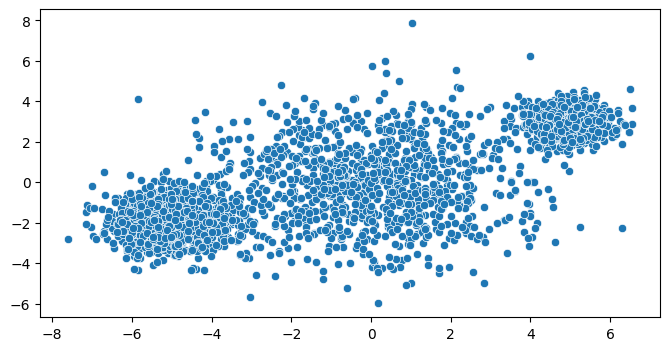

In [30]:
f, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax)
sns.despine()
plt.show()

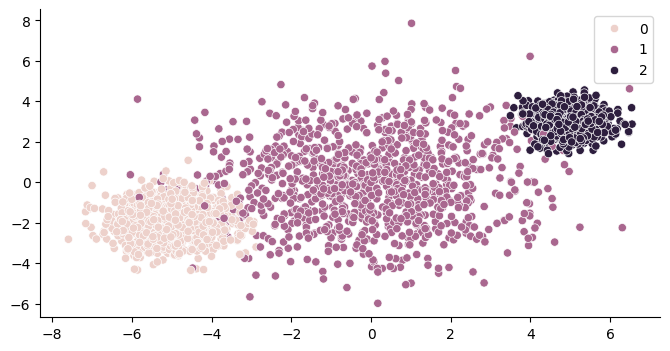

In [31]:
f, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax)
sns.despine()
plt.show()

In [33]:
hdbscan_model = HDBSCAN(min_cluster_size=50, min_samples=25)
hdbscan_labels = hdbscan_model.fit_predict(X)

In [36]:
blob_df['hdbscan'] = hdbscan_labels

In [37]:
blob_df.head(2)

x         y  label  hdbscan
0 -4.349979 -0.915008      0        1
1  5.340681  2.423154      2        0

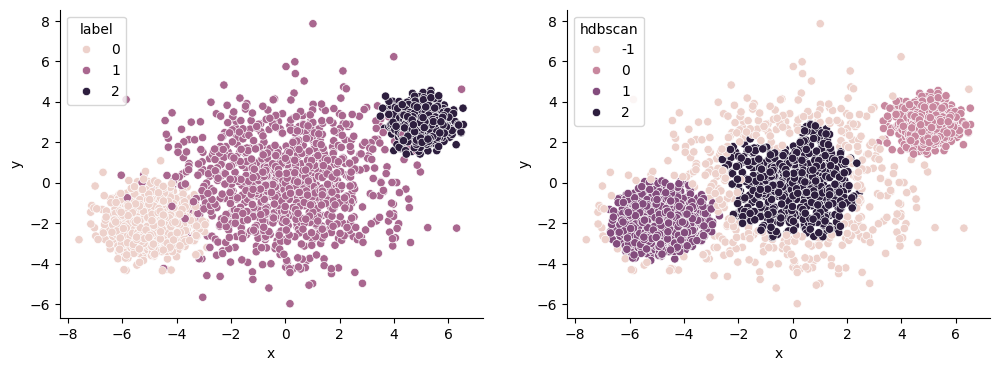

In [39]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(data=blob_df, x='x', y='y', hue='label', ax=ax[0])
sns.scatterplot(data=blob_df, x='x', y='y', hue='hdbscan', ax=ax[1])
sns.despine()
plt.show()

In [40]:
dbscan_model = DBSCAN(eps=0.15, min_samples=5, n_jobs=-1)
dbscan_labels = dbscan_model.fit_predict(X)

In [41]:
blob_df['dbscan'] = dbscan_labels

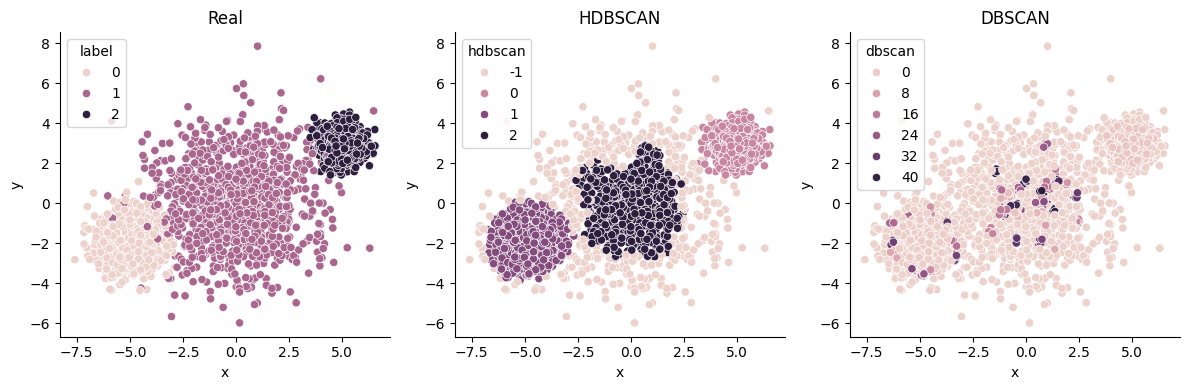

In [42]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.scatterplot(data=blob_df, x='x', y='y', hue='label', ax=ax[0])
sns.scatterplot(data=blob_df, x='x', y='y', hue='hdbscan', ax=ax[1])
sns.scatterplot(data=blob_df, x='x', y='y', hue='dbscan', ax=ax[2])

ax[0].set_title('Real')
ax[1].set_title('HDBSCAN')
ax[2].set_title('DBSCAN')

sns.despine()
plt.tight_layout()
plt.show()